In [4]:
import vk_api
# https://vkhost.github.io/

In [5]:
token = ''

session = vk_api.VkApi(token=token)
vk = session.get_api()

In [6]:
import networkx as nx
G = nx.Graph()
member_ids = [174882350, 284212489] # Я, Дима
for member in member_ids:
    friends = vk.friends.get(user_id=284212489)
    result = [G.add_edge(member, friend) for friend in friends['items']]
    

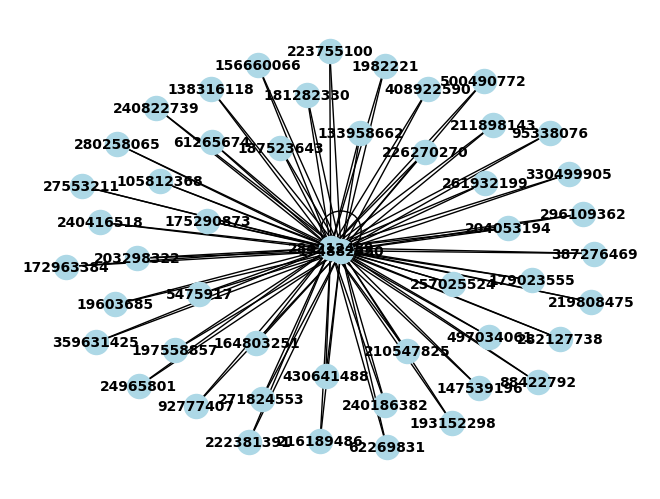

In [7]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()


In [8]:
import time
def get_friends(vk, user_id):
    try:
        friends = vk.friends.get(user_id=user_id)
        return [friend for friend in friends['items']]
    except Exception as e:
        print(e)
        return []
        

G1 = nx.Graph()
member_ids = [174882350, 284212489]
for member in member_ids:
    G1.add_node(member)
    friends = get_friends(vk, member)

    for friend in friends:
        print(friend)
        G1.add_node(friend)
        G1.add_edge(member, friend)
        fofs = get_friends(vk, user_id=friend)[:50]
        for fof in fofs:
            G1.add_node(fof)
            G1.add_edge(friend, fof)

    time.sleep(1)

7812021
22327924
25619718
32465073
55812805
58233294
61265674
62269831
86345575
89264434
95260791
98420580
99138057
101116148
105812368
141853516
147121365
156900842
160963937
168351185
174386635
175264542
177175953
180093273
181005311
181282330
183224188
184917101
185141820
185441211
186173099
190139557
194749060
198490835
201608214
206519182
216189486
223759826
226159941
232013653
233436851
234865369
237213071
240822739
243284565
247950199
250750285
252601919
261932199
265131865
267746880
269469466
271798733
274660972
283277226
284212489
286752329
315628980
316240646
322000425
329105931
333772556
335869669
344212321
355485466
359749711
385756588
421613546
426389352
429302456
439977353
449404647
480159280
515055204
552751001
579006954
584070939
585121428
601659464
604661806
710281898
1982221
[30] This profile is private
5475917
19603685
24965801
[30] This profile is private
27553211
61265674
62269831
88422792
92777407
95338076
105812368
133958662
138316118
[30] This profile is private

Пришлось обрезать друзей друзей до 50, иначе получалось number_of_edges 35.000 и программа отрабатывалась больше часа

In [9]:
G1.number_of_edges()

4997

In [10]:
G1.number_of_nodes()

4440

In [11]:
# Центральность по посредничеству
betweenness = nx.betweenness_centrality(G1)
for node, value in betweenness.items():
    print(f"Узел {node}: {value}")

Узел 174882350: 0.7887656919680791
Узел 7812021: 0.022403232603472375
Узел 61107: 0.0
Узел 207854: 0.0
Узел 695327: 0.0
Узел 706789: 0.0
Узел 776208: 0.0
Узел 851403: 0.0
Узел 1049199: 0.0
Узел 1314235: 0.0
Узел 1383143: 0.0
Узел 1586392: 0.0
Узел 1610011: 0.0
Узел 1618260: 0.0
Узел 1739730: 0.0
Узел 1845733: 0.0
Узел 1870994: 0.0
Узел 1885527: 0.0
Узел 2190663: 0.0
Узел 3225876: 0.0
Узел 3300623: 0.0
Узел 3346527: 0.0
Узел 3349406: 0.0
Узел 3472249: 0.0
Узел 3535510: 0.0
Узел 3586147: 0.0
Узел 3720561: 0.0
Узел 4416812: 0.0
Узел 4489798: 0.0
Узел 4625327: 0.0
Узел 4706176: 0.0
Узел 4796369: 0.0
Узел 5016386: 0.0
Узел 5070244: 0.0
Узел 5105616: 0.0
Узел 5626395: 0.0
Узел 6123089: 0.0
Узел 6319942: 0.0
Узел 6658725: 0.0
Узел 6802762: 0.0
Узел 7106777: 0.0
Узел 7325917: 0.0
Узел 7450278: 0.0
Узел 7491982: 0.0
Узел 7652757: 0.0
Узел 7933815: 0.0
Узел 8305612: 0.0
Узел 8463607: 0.0
Узел 8666068: 0.0
Узел 8810206: 0.0
Узел 9418306: 0.0
Узел 9576242: 0.0
Узел 22327924: 0.022403232603472375
У

In [12]:
# Центральность по близости
closeness = nx.closeness_centrality(G1)
for node, value in closeness.items():
    print(f"Узел {node}: {value}")

Узел 174882350: 0.44815749621403334
Узел 7812021: 0.3116618689882749
Узел 61107: 0.23762111236015201
Узел 207854: 0.23762111236015201
Узел 695327: 0.23762111236015201
Узел 706789: 0.23762111236015201
Узел 776208: 0.23762111236015201
Узел 851403: 0.23762111236015201
Узел 1049199: 0.23762111236015201
Узел 1314235: 0.23762111236015201
Узел 1383143: 0.23762111236015201
Узел 1586392: 0.23762111236015201
Узел 1610011: 0.23762111236015201
Узел 1618260: 0.23762111236015201
Узел 1739730: 0.23762111236015201
Узел 1845733: 0.23762111236015201
Узел 1870994: 0.23762111236015201
Узел 1885527: 0.23762111236015201
Узел 2190663: 0.23762111236015201
Узел 3225876: 0.23762111236015201
Узел 3300623: 0.23762111236015201
Узел 3346527: 0.23762111236015201
Узел 3349406: 0.23762111236015201
Узел 3472249: 0.23762111236015201
Узел 3535510: 0.23762111236015201
Узел 3586147: 0.23762111236015201
Узел 3720561: 0.23762111236015201
Узел 4416812: 0.23762111236015201
Узел 4489798: 0.23762111236015201
Узел 4625327: 0.2376

In [13]:
# Центральность по собственному значению
eigenvector = nx.eigenvector_centrality(G1)
for node, value in eigenvector.items():
    print(f"Узел {node}: {value}")

Узел 174882350: 0.410793790003307
Узел 7812021: 0.03501157572856484
Узел 61107: 0.002325667404551192
Узел 207854: 0.002325667404551192
Узел 695327: 0.002325667404551192
Узел 706789: 0.002325667404551192
Узел 776208: 0.002325667404551192
Узел 851403: 0.002325667404551192
Узел 1049199: 0.002325667404551192
Узел 1314235: 0.002325667404551192
Узел 1383143: 0.002325667404551192
Узел 1586392: 0.002325667404551192
Узел 1610011: 0.002325667404551192
Узел 1618260: 0.002325667404551192
Узел 1739730: 0.002325667404551192
Узел 1845733: 0.002325667404551192
Узел 1870994: 0.002325667404551192
Узел 1885527: 0.002325667404551192
Узел 2190663: 0.002325667404551192
Узел 3225876: 0.002325667404551192
Узел 3300623: 0.002325667404551192
Узел 3346527: 0.002325667404551192
Узел 3349406: 0.002325667404551192
Узел 3472249: 0.002325667404551192
Узел 3535510: 0.002325667404551192
Узел 3586147: 0.002325667404551192
Узел 3720561: 0.002325667404551192
Узел 4416812: 0.002325667404551192
Узел 4489798: 0.0023256674045

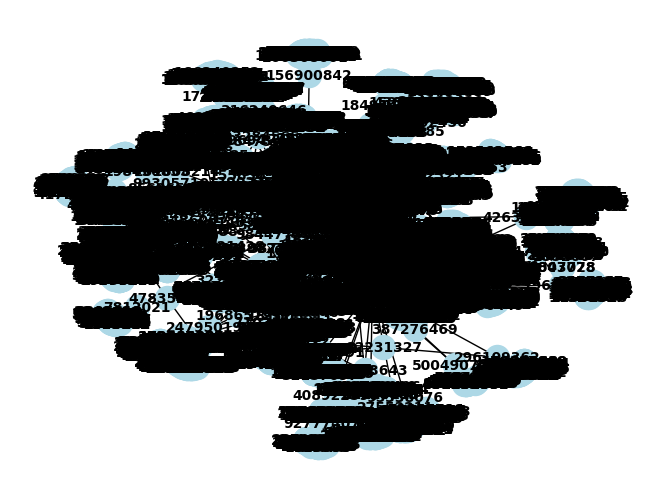

In [14]:
nx.draw(G1, with_labels=True, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()

In [17]:
# Максимальное значение центральости по посреднечеству
max_key = max(betweenness, key=betweenness.get)
print(f"ID узла: {max_key}, Значение: {betweenness[max_key]}")

ID узла: 174882350, Значение: 0.7887656919680791


In [18]:
# Максимальное значение центральность по близости
max_key_1 = max(closeness, key=closeness.get)
print(f"ID узла: {max_key_1}, Значение: {closeness[max_key_1]}")

ID узла: 174882350, Значение: 0.44815749621403334


In [19]:
# Максимальное значение центральность по собственному значению
max_key_2 = max(eigenvector, key=eigenvector.get)
print(f"ID узла: {max_key_2}, Значение: {eigenvector[max_key_2]}")

ID узла: 174882350, Значение: 0.410793790003307
